In [1]:
import cv2
import numpy as np
import os

In [2]:
def stitch_images(input_images, output_image, blender, features_finder, features_matcher, warper):
    """
    Realiza el stitching de múltiples imágenes para crear un panorama
    """
    # Verificar que las imágenes existen
    for img_path in input_images:
        if not os.path.exists(img_path):
            raise FileNotFoundError(f"No se encuentra la imagen: {img_path}")
    
    # Crear el stitcher
    mode = cv2.Stitcher_PANORAMA
    stitcher = cv2.Stitcher.create(mode)
    
    # Cargar las imágenes
    imgs = []
    for img_path in input_images:
        img = cv2.imread(img_path)
        if img is not None:
            imgs.append(img)
    
    if len(imgs) < 2:
        raise ValueError("Se necesitan al menos 2 imágenes para el stitching")
    
    # Realizar el stitching
    status, panorama = stitcher.stitch(imgs)
    
    if status != cv2.Stitcher_OK:
        error_msgs = {
            cv2.Stitcher_ERR_NEED_MORE_IMGS: "No hay suficientes imágenes",
            cv2.Stitcher_ERR_HOMOGRAPHY_EST_FAIL: "Error en estimación de homografía",
            cv2.Stitcher_ERR_CAMERA_PARAMS_ADJUST_FAIL: "Error en ajuste de parámetros de cámara"
        }
        error_msg = error_msgs.get(status, f"Error desconocido en stitching: {status}")
        raise RuntimeError(error_msg)
    
    # Guardar el resultado
    cv2.imwrite(output_image, panorama)
    
    return panorama

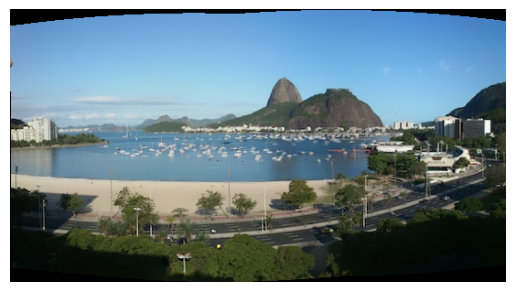

In [4]:

# Ejemplo de uso
result = stitch_images(
		input_images = ['panorama1-input-1.jpg', 'panorama1-input-2.jpg', 'panorama1-input-3.jpg'],
		# input_images = ['i1.jpg', 'i2.jpg', 'i3.jpg'],
		# input_images = ['a1.jpg', 'a2.jpg', 'a3.jpg', 'a4.jpg', 'a5.jpg'],
    output_image="panorama.jpg",
    # blender="MultiBandBlender",
    blender="FeatherBlender",
    features_finder="SIFT",
    # features_finder="ORB",
    features_matcher="BestOf2NearestRange",
    warper="Spherical"
)

# Mostara imagen resultante en la celda de abajo de juoyter con matplotlib
import matplotlib.pyplot as plt
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()